In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import eig
from sklearn.metrics import silhouette_score
import random as rd

In [2]:
# read the dataset
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.info() #checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
#no null values found.

#From data dictionary, we infer that exports, health and imports are expressed as percentages of gdp. 
#Converting percentages to absolute values:
data['exports'] = data['exports']*data['gdpp']/100
data['imports'] = data['imports']*data['gdpp']/100
data['health'] = data['health']*data['gdpp']/100
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


<AxesSubplot:>

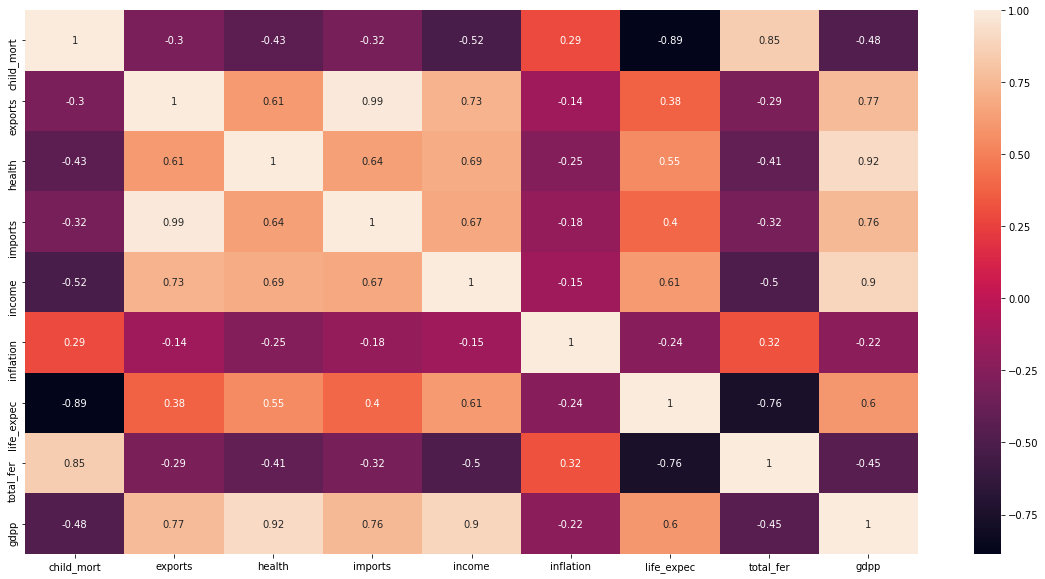

In [5]:
#plotting heatmap to observe correlation
plt.figure(figsize=[20,10])
sns.heatmap(data.corr(),annot=True)

In [6]:
#We observe very high values of correlation between features such as imports/exports, child_mort/life_expec, health/gdpp
#We shall implement feature abstraction through PCA
#dropping country name column:
num_data=data.drop(['country'],axis=1)
# num_data.head()
num_data.shape

(167, 9)

In [7]:
m = np.mean(num_data, axis =0)
s = np.std(num_data, axis=0)
x_centered = (num_data - m)/s
x_centered

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,-0.336864,-0.501562,-0.342488,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.199393,-0.219310,-0.287205,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,-0.361463,-0.538488,-0.377572,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.392166,-0.550596,-0.418479,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [8]:
#PCA Algorithm:
#Covariance Matrix:
C = np.dot(x_centered.T, x_centered)/x_centered.shape[0]
C.shape

(9, 9)

In [9]:
#Eigenvalue and Eigenvector matrices:
w,v=eig(C)
print('E-value:', w)
print('E-vector', v)

E-value: [5.30435686e+00 1.66006517e+00 8.92032453e-01 5.46505021e-01
 2.72625527e-01 2.21384432e-01 8.45769331e-02 1.40077774e-02
 4.44583255e-03]
E-vector [[-0.31639186  0.47626735  0.15001225  0.14805195  0.1019948  -0.19658519
  -0.76126725  0.00644411  0.00495137]
 [ 0.34288671  0.39731091  0.03057367 -0.44942527 -0.03853829  0.03891112
   0.01366973 -0.05526371  0.71792388]
 [ 0.358535    0.1550529   0.07570322  0.59971228 -0.49319984 -0.18069888
   0.06461567  0.43007213  0.13034593]
 [ 0.34486492  0.37078075  0.07217386 -0.46179779 -0.2527867   0.01217988
  -0.02718244  0.1311355  -0.66568664]
 [ 0.38004113  0.12838448 -0.14576421  0.15480592  0.79407469  0.03814681
   0.02311312  0.3938113  -0.07901102]
 [-0.14308531  0.22126089 -0.94841868  0.00762798 -0.13642345 -0.10840284
   0.02207663 -0.00607016 -0.01128137]
 [ 0.34385651 -0.36981973 -0.19675173  0.01839465 -0.15404105  0.58600986
  -0.58120846  0.002966    0.03159406]
 [-0.30284224  0.4597152   0.07783431  0.21392805 -0

In [10]:
#Computing the n eworder of indices after sorting eigenvalues:
sort_index=np.argsort(w)[::-1]
print(sort_index)

[0 1 2 3 4 5 6 7 8]


In [11]:
#sorting eigenvalue and eigenvector matrices:
w = w[sort_index]
v = v[:, sort_index]

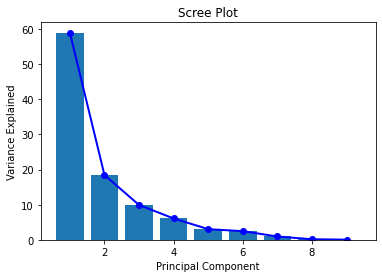

In [12]:
#Scree plot to select number of principal components to retain
total = sum(w)
explained_variance = [(i / total)*100 for i in w]
explained_variance
PC_values = np.arange(w.shape[0]) + 1
plt.plot(PC_values, explained_variance, 'o-', linewidth=2, color='blue')
plt.bar(PC_values, explained_variance)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [13]:
np.cumsum(explained_variance)

array([ 58.93729842,  77.38246694,  87.29393863,  93.36621664,
        96.39538917,  98.85521619,  99.79495989,  99.95060186,
       100.        ])

In [14]:
#We retain the first four principal components - PC1, PC2, PC3, PC4
p = 4
features = v[:,0:p]
pc = np.dot(x_centered, features)
X = pc
m = X.shape[0]  #167
n = X.shape[1]  #3
rownames = list(data['country'])
pcs_df = pd.DataFrame({'country':rownames,'PC1':pc[:, 0],'PC2':pc[:, 1],'PC3':pc[:, 2],'PC4':pc[:, 3]})
pcs_df.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.635575,1.472267,0.549489,0.242326
1,Albania,-0.024206,-1.429892,0.014123,-0.450645
2,Algeria,-0.459557,-0.675495,-0.959355,-0.218456
3,Angola,-2.722630,2.172332,-0.600215,0.433978
4,Antigua and Barbuda,0.648597,-1.023437,0.257430,-0.289201


<AxesSubplot:xlabel='PC3', ylabel='PC1'>

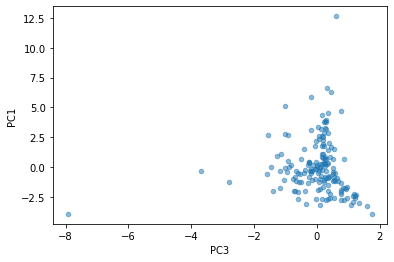

In [15]:
pcs_df.plot.scatter(x="PC3", y="PC1", alpha=0.5)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

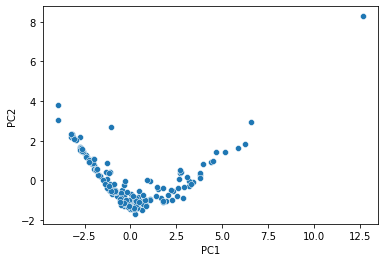

In [16]:
sns.scatterplot(x='PC1',y='PC2',data=pcs_df)

<AxesSubplot:xlabel='PC3', ylabel='PC2'>

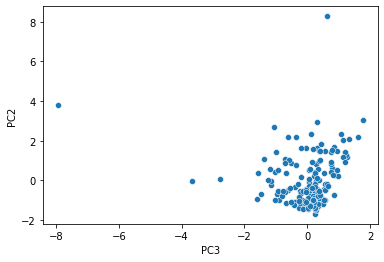

In [17]:
sns.scatterplot(x='PC3',y='PC2',data=pcs_df)

<AxesSubplot:xlabel='PC1', ylabel='PC4'>

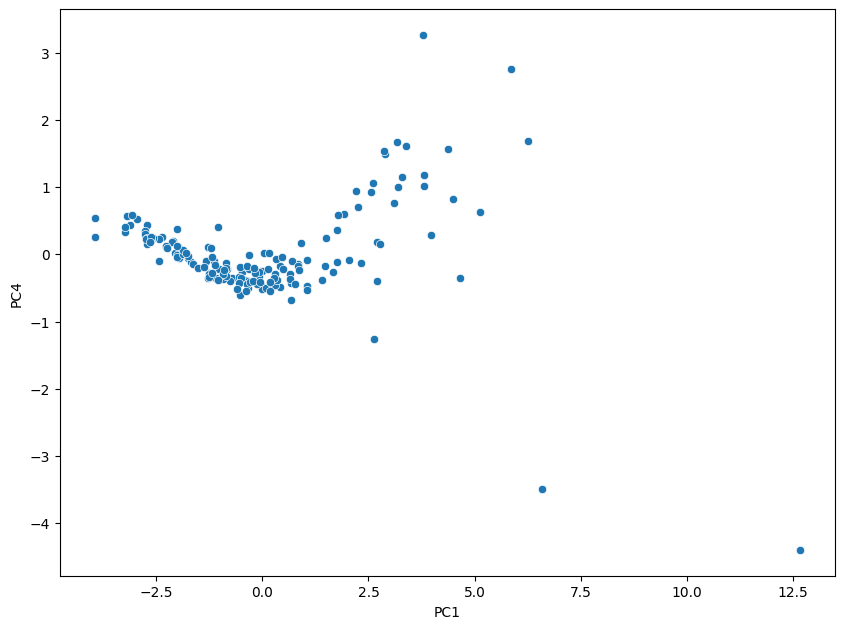

In [32]:
sns.scatterplot(x='PC1',y='PC4',data=pcs_df)

In [31]:
def k_means(K):
    #Random Initialisation
    Centroids=np.array([]).reshape(n,0)
    for i in range(K):
        rand=rd.randrange(0,m-1)
        Centroids=np.c_[Centroids,X[rand]]
    output={}
    for i in range(500):
        #Cluster Assignment
        euclid=np.array([]).reshape(m,0)
        for k in range(K):
            dist=np.sum((pc-Centroids[:,k])**2,axis=1)
            euclid=np.c_[euclid,dist]
        C=np.argmin(euclid,axis=1)+1
        
        #Move Centroid
        cent={}
        for k in range(K):
            cent[k+1]=np.array([]).reshape(n,0)
        for k in range(m):
            cent[C[k]]=np.c_[cent[C[k]],pc[k]]
        for k in range(K):
            cent[k+1]=cent[k+1].T
        for k in range(K):
            Centroids[:,k]=np.mean(cent[k+1],axis=0)
        final=cent
        
    #Generating Labels
    labels=[]
    for i in pc:
        for j in final.keys():
            if i in final[j]:
                labels.append(j)
                break

    labels = np.array(labels)
    return labels

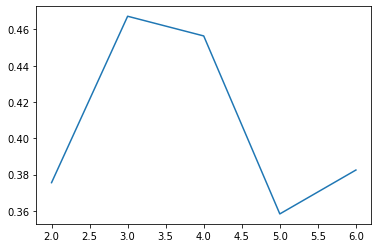

In [21]:
#Plotting Silhouette Scores vs K means to choose K value
plot_scores = []
for i in range(2,7):
    plot_scores.append(silhouette_score(pc, k_means(i)))
plt.plot(range(2, 7), plot_scores)
plt.show()

In [48]:
#Number of Clusters chosen = 3
K = 3
clustered_df = pd.concat([pcs_df, pd.Series(k_means(K))], axis=1)
clustered_df.columns = ['country', 'PC1', 'PC2','PC3','PC4','ClusterID']
clustered_df.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-2.635575,1.472267,0.549489,0.242326,3
1,Albania,-0.024206,-1.429892,0.014123,-0.450645,2
2,Algeria,-0.459557,-0.675495,-0.959355,-0.218456,2
3,Angola,-2.722630,2.172332,-0.600215,0.433978,3
4,Antigua and Barbuda,0.648597,-1.023437,0.257430,-0.289201,2


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

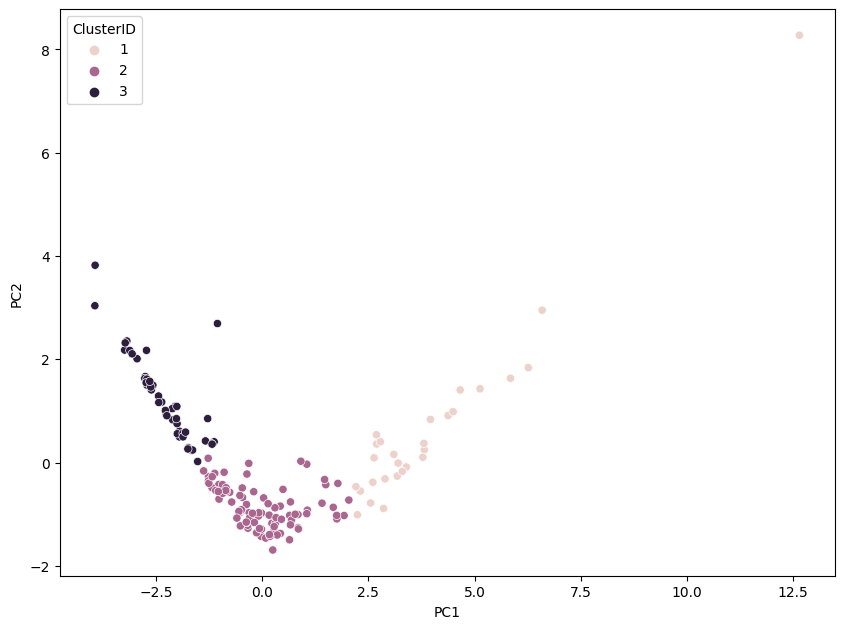

In [49]:
#Visualing clustered data w.r.t. various principal components
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=clustered_df)

<AxesSubplot:xlabel='PC3', ylabel='PC1'>

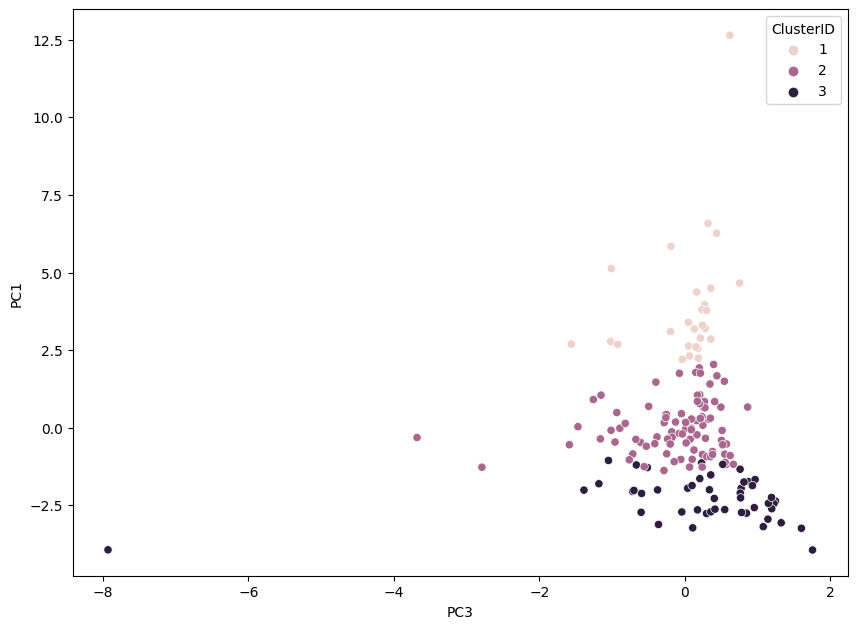

In [50]:
sns.scatterplot(x='PC3',y='PC1',hue='ClusterID',legend='full',data=clustered_df)

<AxesSubplot:xlabel='PC3', ylabel='PC2'>

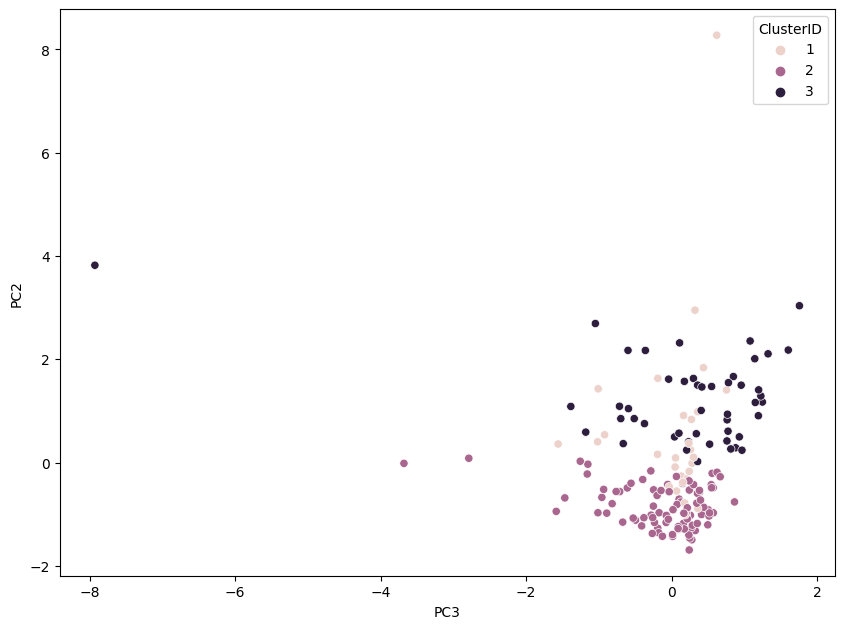

In [51]:
sns.scatterplot(x='PC3',y='PC2',hue='ClusterID',legend='full',data=clustered_df)

<AxesSubplot:xlabel='PC1', ylabel='PC4'>

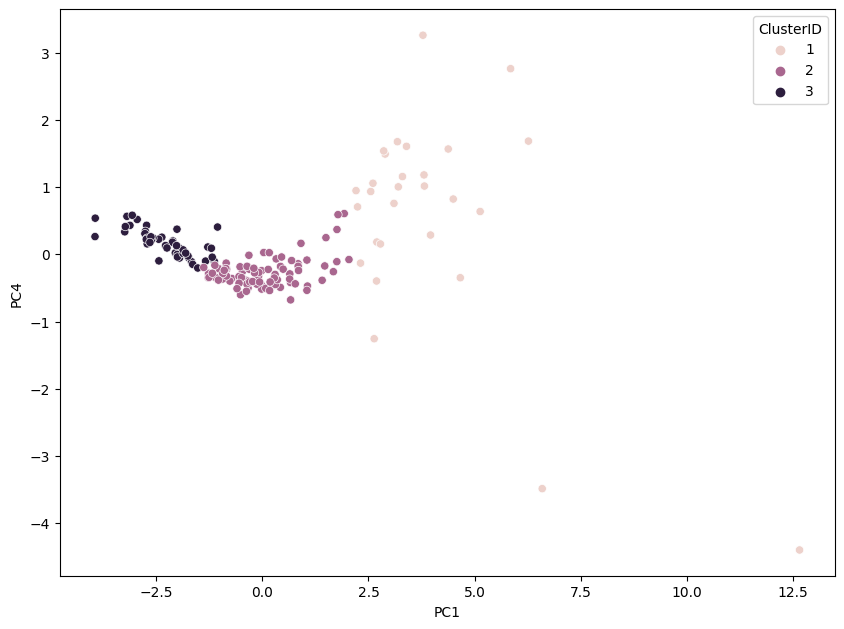

In [52]:
sns.scatterplot(x='PC1',y='PC4',hue='ClusterID',legend='full',data=clustered_df)

In [55]:
feature_df=pd.merge(data,clustered_df,on='country')
feature_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.635575,1.472267,0.549489,0.242326,3
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.024206,-1.429892,0.014123,-0.450645,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459557,-0.675495,-0.959355,-0.218456,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.722630,2.172332,-0.600215,0.433978,3
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.648597,-1.023437,0.257430,-0.289201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,-1.175210,-0.275652,0.667131,-0.279628,2
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500,-0.314228,-0.016266,-3.680273,-0.011835,2
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,-0.594449,-1.076335,-0.528875,-0.508854,2
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310,-1.802372,0.588729,-1.180851,0.020241,3


In [64]:
feature_df1=feature_df[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','ClusterID']]
clu_chi = pd.DataFrame(feature_df1.groupby(["ClusterID"]).child_mort.mean())
clu_exp = pd.DataFrame(feature_df1.groupby(["ClusterID"]).exports.mean())
clu_imp = pd.DataFrame(feature_df1.groupby(["ClusterID"]).imports.mean())
clu_hea = pd.DataFrame(feature_df1.groupby(["ClusterID"]).health.mean())
clu_inc = pd.DataFrame(feature_df1.groupby(["ClusterID"]).income.mean())
clu_inf = pd.DataFrame(feature_df1.groupby(["ClusterID"]).inflation.mean())         
clu_lif = pd.DataFrame(feature_df1.groupby(["ClusterID"]).life_expec.mean())
clu_tot = pd.DataFrame(feature_df1.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp = pd.DataFrame(feature_df1.groupby(["ClusterID"]).gdpp.mean())

cluster_df1 = pd.concat([pd.Series([0,1,2,3]),clu_chi,clu_exp,clu_imp,clu_hea,clu_inc,clu_inf,clu_lif,clu_tot,clu_gdpp], axis=1)
cluster_df1.columns = ["ClusterID", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
cluster_df1

,ClusterID,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5.046429,31038.239286,25818.100000,4327.163214,50178.571429,3.014679,80.514286,1.760714,48114.285714
2,2,20.357143,3604.149434,3710.446386,547.279455,13968.021978,7.070549,73.460440,2.235055,7979.912088
3,3,91.610417,879.063521,827.028771,114.821765,3897.354167,11.911146,59.239583,4.992083,1909.208333


<AxesSubplot:xlabel='child_mort', ylabel='income'>

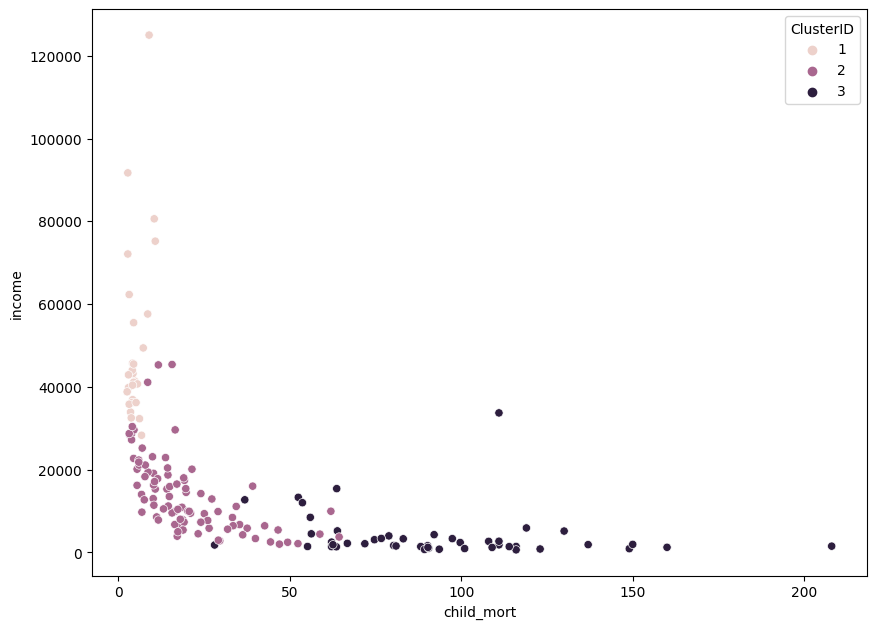

In [65]:
sns.scatterplot(x='child_mort',y='income',hue='ClusterID',data=feature_df1)

<AxesSubplot:xlabel='income', ylabel='gdpp'>

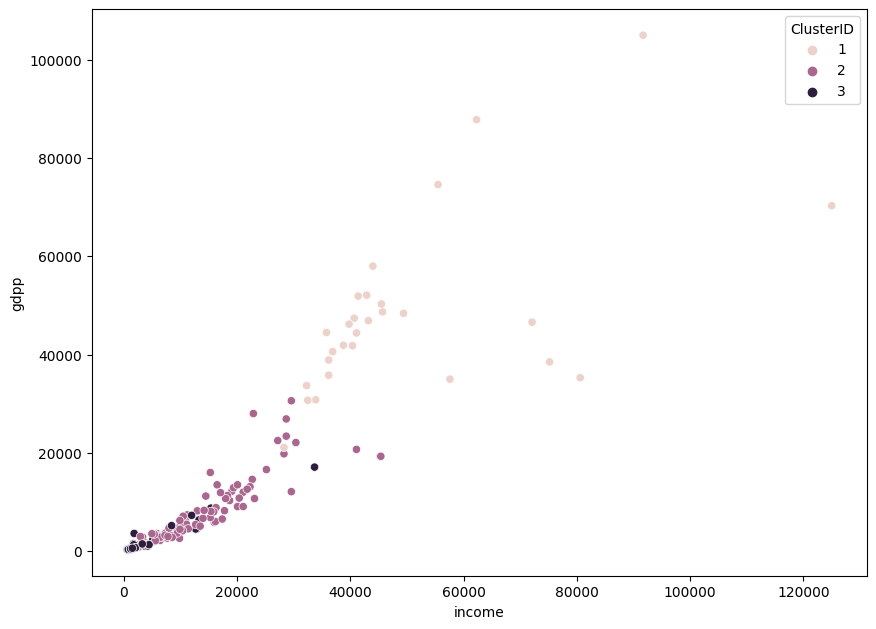

In [69]:
sns.scatterplot(x='income',y='gdpp', hue='ClusterID', data=feature_df1)

In [70]:
#Cluster 3 shows low values of income and gdpp, and high value of child mortality.
#Following is the list of countries in need of socio-economic improvement and healthcare
feature_df1[feature_df1['ClusterID']==3]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.440,56.2,5.82,553,3
3,Angola,119.0,2199.1900,1514.370,100.6050,5900,22.400,60.1,6.16,3530,3
17,Benin,111.0,180.4040,281.976,31.0780,1820,0.885,61.8,5.36,758,3
21,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.920,57.1,2.88,6350,3
25,Burkina Faso,116.0,110.4000,170.200,38.7550,1430,6.810,57.9,5.87,575,3
26,Burundi,93.6,20.6052,90.552,26.7960,764,12.300,57.7,6.26,231,3
28,Cameroon,108.0,290.8200,353.700,67.2030,2660,1.910,57.3,5.11,1310,3
31,Central African Republic,149.0,52.6280,118.190,17.7508,888,2.010,47.5,5.21,446,3
32,Chad,150.0,330.0960,390.195,40.6341,1930,6.390,56.5,6.59,897,3
36,Comoros,88.2,126.8850,397.573,34.6819,1410,3.870,65.9,4.75,769,3


In [71]:
#The following countries have a good socio-economic status
feature_df1[feature_df1['ClusterID']==1]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,10276.2,10847.1,4530.87,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,24059.7,22418.2,5159.00,43200,0.873,80.5,1.44,46900,1
15,Belgium,4.5,33921.6,33166.8,4750.80,41100,1.880,80.0,1.86,44400,1
23,Brunei,10.5,23792.2,9884.0,1002.52,80600,16.700,77.1,1.84,35300,1
29,Canada,5.6,13793.4,14694.0,5356.20,40700,2.870,81.3,1.63,47400,1
42,Cyprus,3.6,15461.6,17710.0,1838.76,33900,2.010,79.9,1.42,30800,1
44,Denmark,4.1,29290.0,25288.0,6612.00,44000,3.220,79.5,1.87,58000,1
53,Finland,3.0,17879.4,17278.8,4134.90,39800,0.351,80.0,1.87,46200,1
54,France,4.2,10880.8,11408.6,4831.40,36900,1.050,81.4,2.03,40600,1
58,Germany,4.2,17681.4,15507.8,4848.80,40400,0.758,80.1,1.39,41800,1
